In [67]:
# Instalamos las bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO


In [84]:
#Importo la data
url = 'https://raw.githubusercontent.com/cienciadedatos/datos-de-miercoles/master/datos/2019/2019-04-10/partidos.txt'
response = requests.get(url)
data = response.text
df = pd.read_csv(StringIO(data), sep='\t')
df
print(df.columns)

Index(['anio', 'anfitrion', 'estadio', 'ciudad', 'partido_orden', 'fecha',
       'equipo_1', 'equipo_2', 'equipo_1_final', 'equipo_2_final'],
      dtype='object')


In [96]:
# Filtrar los datos para partidos en los que el "Equipo 1" es Chile o Colombia
filtro_equipo1 = df[(df['equipo_1'] == 'Chile') | (df['equipo_1'] == 'Colombia')]


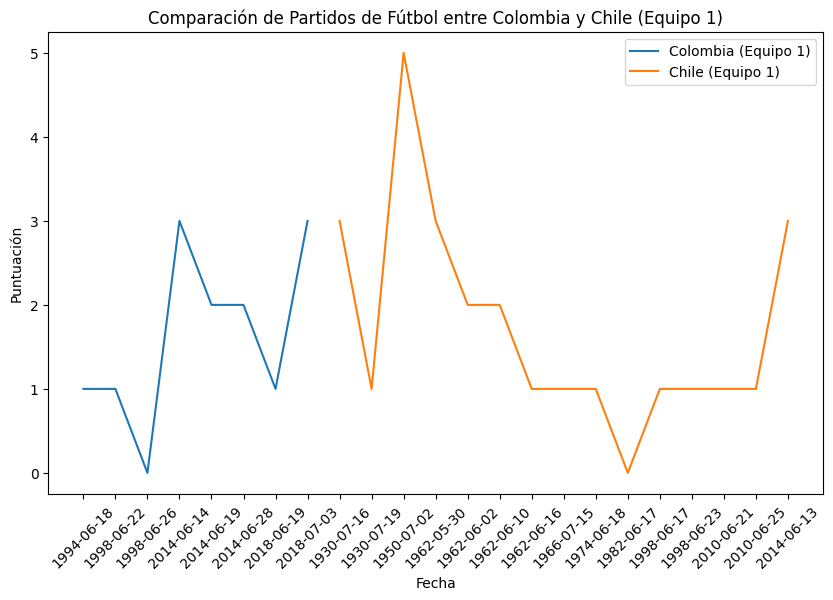

In [97]:
# Gráfico 1: Todos los países en el mismo cuadro
plt.figure(figsize=(10, 6))
plt.title("Comparación de Partidos de Fútbol entre Colombia y Chile (Equipo 1)")
plt.xlabel("Fecha")
plt.ylabel("Puntuación")

paises = ['Colombia', 'Chile']

for pais in paises:
    pais_data = filtro_equipo1[(filtro_equipo1['equipo_1'] == pais)]
    plt.plot(pais_data['fecha'], pais_data['equipo_1_final'], label=f'{pais} (Equipo 1)')

plt.legend()
plt.xticks(rotation=45)

# Guardar el gráfico en un archivo
plt.savefig('grafico_comparativo.png')

C:\Users\Michelle Cevallos\AppData\Local\Temp\ipykernel_5392\519624771.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pais_data['fecha'] = pd.to_datetime(pais_data['fecha'], format='%Y-%m-%d')
C:\Users\Michelle Cevallos\AppData\Local\Temp\ipykernel_5392\519624771.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pais_data['fecha'] = pd.to_datetime(pais_data['fecha'], format='%Y-%m-%d')


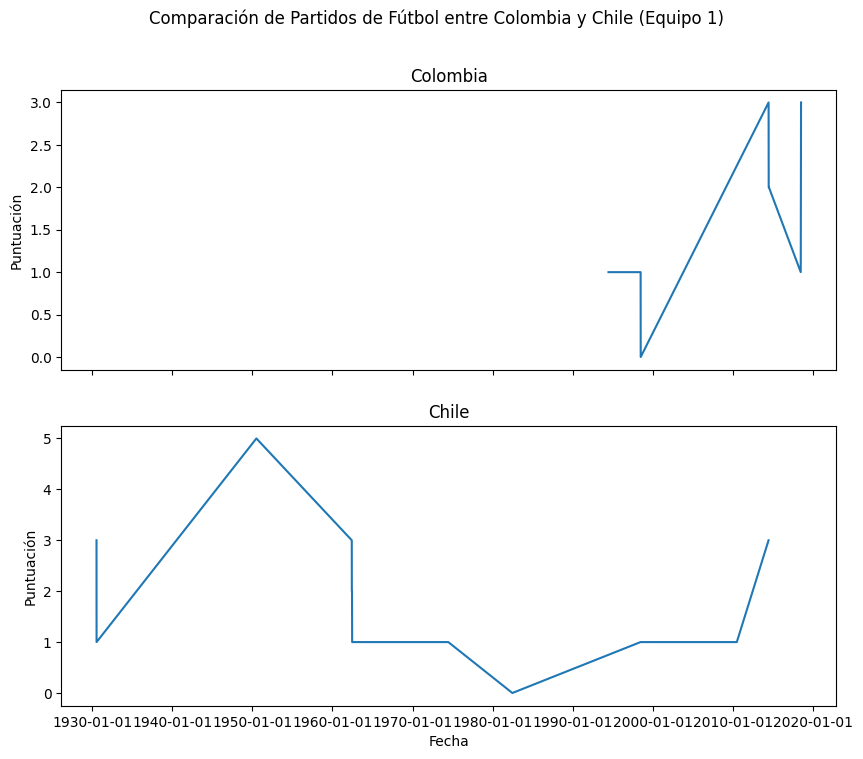

In [101]:
# Filtrar los datos Colombia y Cile
paises = ['Colombia', 'Chile']
filtro_paises = df[df['equipo_1'].isin(paises)]

# Grafico 2 : Dos paises en diferentes cuadros
fig, axes = plt.subplots(len(paises), 1, figsize=(10, 8), sharex=True)

fig.suptitle("Comparación de Partidos de Fútbol entre Colombia y Chile (Equipo 1)")

for i, pais in enumerate(paises):
    pais_data = filtro_paises[filtro_paises['equipo_1'] == pais]
    
    pais_data['fecha'] = pd.to_datetime(pais_data['fecha'], format='%Y-%m-%d')
    
    axes[i].plot(pais_data['fecha'], pais_data['equipo_1_final'], label=f'{pais} (Equipo 1)')
    axes[i].set_title(pais)
    axes[i].set_ylabel('Puntuación')
    
    if i == len(paises) - 1:
        axes[i].set_xlabel('Fecha')
        axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Guardar el gráfico 
plt.savefig('subgraficos_comparativos.png')

plt.show()
